# 4 - Pipeline de Entrenamiento y Validación de Modelos

Ahora que has creado las características, puedes utilizarlas para entrenar uno o más modelos. En esta sección, generarás vectores de características que combinan múltiples atributos de uno o más conjuntos de características (feature sets). Estos vectores serán la entrada para un pipeline automatizado de entrenamiento y pruebas de modelos de machine learning (ML), con el objetivo de crear modelos de alta calidad.

### Pipeline de ML

- Propósito: Entrenar y validar modelos automáticamente utilizando las características generadas.

- Entrada: Vectores de características obtenidos de uno o más conjuntos de características.

- Resultado: Modelos entrenados y validados listos para producción.

#### Opciones de ejecución

1. Interactividad:Durante el desarrollo, puedes activar y rastrear manualmente el pipeline para ajustar parámetros y analizar resultados.

2. Automatización:Guarda el pipeline en un repositorio Git y ejecútalo automáticamente según un cronograma o en respuesta a eventos específicos, como:

- Modificaciones en el código.

- Cambios en los datos.

- Detectores de desviación de modelos (model drift).

- Procesos de CI/CD.

### Guardar y Cargar Proyectos desde GIT

Una vez que hayas guardado tu proyecto y sus elementos (funciones, flujos de trabajo, artefactos, etc.), puedes realizar un commit de todos los cambios en un repositorio GIT. Esto se puede hacer usando herramientas estándar de GIT o los métodos del módulo project de MLRun, como pull, push y remote, que llaman automáticamente a la API de GIT.

In [ ]:
import mlrun
project = mlrun.get_or_create_project(
    name="fraud-demo",
    context="./",
    user_project=True,
)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
> 2024-10-08 13:19:58,328 [info] Project loaded successfully: {"project_name":"fraud-demo-felipe"}


## Creación y Evaluación de un Vector de Características

Los modelos se entrenan utilizando múltiples características, que pueden provenir de diferentes conjuntos de características (feature sets). Estas características se agrupan en vectores de características de entrenamiento. Los feature stores permiten combinar las características correctamente mediante JOINs inteligentes y la evaluación de la dimensión temporal (time traveling).

### Definir un vector de características
Para crear un vector de características, debes especificar:

- Nombre del vector de características.

- Lista de características que contiene.

- Características objetivo (target features, etiquetas).

- Otros parámetros opcionales según tus necesidades.

Las características se definen en el formato:

- \<FeatureSet>.<Feature>: Una característica específica de un conjunto.

- \<FeatureSet>.*: Todas las características de un conjunto.


### Creacción de un vector de características

In [ ]:
import mlrun.feature_store as fstore
from mlrun.datastore.targets import ParquetTarget

In [ ]:
features = ['events.*',
            'transactions.amount_max_2h', 
            'transactions.amount_sum_2h', 
            'transactions.amount_count_2h',
            'transactions.amount_avg_2h', 
            'transactions.amount_max_12h', 
            'transactions.amount_sum_12h',
            'transactions.amount_count_12h', 
            'transactions.amount_avg_12h', 
            'transactions.amount_max_24h',
            'transactions.amount_sum_24h', 
            'transactions.amount_count_24h', 
            'transactions.amount_avg_24h',
            'transactions.es_transportation_sum_14d', 
            'transactions.es_health_sum_14d',
            'transactions.es_otherservices_sum_14d', 
            'transactions.es_food_sum_14d',
            'transactions.es_hotelservices_sum_14d', 
            'transactions.es_barsandrestaurants_sum_14d',
            'transactions.es_tech_sum_14d', 
            'transactions.es_sportsandtoys_sum_14d',
            'transactions.es_wellnessandbeauty_sum_14d', 
            'transactions.es_hyper_sum_14d',
            'transactions.es_fashion_sum_14d', 
            'transactions.es_home_sum_14d', 
            'transactions.es_travel_sum_14d', 
            'transactions.es_leisure_sum_14d',
            'transactions.gender_F',
            'transactions.gender_M',
            'transactions.step', 
            'transactions.amount', 
            'transactions.timestamp_hour',
            'transactions.timestamp_day_of_week']

In [ ]:
fv_name = 'transactions-fraud'

transactions_fv = fstore.FeatureVector(fv_name, 
                          features, 
                          label_feature="labels.label",
                          description='Predicting a fraudulent transaction')

transactions_fv.save()

In [ ]:
data = transactions_fv.get_offline_features(target=ParquetTarget())

> 2024-10-08 13:20:06,351 [info] Merger detected timestamp resolution incompatibility between feature set labels and others: datetime64[us] and datetime64[ms]. Converting feature set timestamp column 'timestamp' to type datetime64[us].
> 2024-10-08 13:20:06,399 [info] wrote target: {'size': 151272, 'name': 'parquet', 'updated': '2024-10-08T13:20:06.399382+00:00', 'partitioned': True, 'path': 'v3io:///projects/fraud-demo-felipe/FeatureStore/transactions-fraud/parquet/vectors/transactions-fraud-latest.parquet', 'kind': 'parquet', 'status': 'ready'}


In [5]:
data

In [8]:
data.to_dataframe().head()

,event_password_change,event_details_change,event_login,amount_max_2h,amount_sum_2h,amount_count_2h,amount_avg_2h,amount_max_12h,amount_sum_12h,amount_count_12h,...,es_home_sum_14d,es_travel_sum_14d,es_leisure_sum_14d,gender_F,gender_M,step,amount,timestamp_hour,timestamp_day_of_week,label
0,0,0,1,1.83,1.83,1.0,1.830000,1.83,1.83,1.0,...,0.0,0.0,0.0,0.0,1.0,72.0,1.83,7.0,6.0,0.0
1,0,0,1,18.72,40.22,3.0,13.406667,18.72,40.22,3.0,...,0.0,0.0,0.0,0.0,1.0,66.0,18.72,7.0,6.0,0.0
2,1,0,0,25.92,64.86,3.0,21.620000,25.92,64.86,3.0,...,0.0,0.0,0.0,0.0,1.0,27.0,25.92,7.0,6.0,0.0
3,1,0,0,24.75,30.17,2.0,15.085000,24.75,30.17,2.0,...,0.0,0.0,0.0,0.0,1.0,141.0,24.75,7.0,6.0,0.0
4,1,0,0,64.18,65.17,2.0,32.585000,64.18,65.17,2.0,...,0.0,0.0,0.0,1.0,0.0,124.0,64.18,7.0,6.0,0.0


Una vez que hemos definido el vector de características, podemos utilizar `get_offline_features()` para generar el conjunto de datos del vector y devolverlo como un dataframe o materializarlo en un archivo (CSV o Parquet). La siguiente parte demuestra cómo recuperar un vector, materializarlo y ver sus resultados.

## Construcción y Ejecución de un Pipeline Automatizado de Entrenamiento y Validación

MLRun permite construir pipelines distribuidos de machine learning que abarcan desde el procesamiento de datos, selección automatizada de características, entrenamiento, optimización, pruebas, despliegues y más. Estos pipelines se componen de pasos que ejecutan o despliegan funciones personalizadas o predefinidas disponibles en el MLRun Hub.

Los pipelines pueden ejecutarse:

- Localmente: Para depuración o tareas de pequeña escala.
- En un clúster escalable de Kubernetes: Usando Kubeflow.
- En un sistema CI/CD: Para integración y despliegue continuo.

### Pasos del Pipeline

El ejemplo incluye los siguientes pasos, todos utilizando funciones predefinidas del MLRun Hub:

- Materializar un vector de características: Usando src/get_vector, se generan los datos necesarios para el entrenamiento a partir del vector de características definido.

- Seleccionar las características más óptimas: Usando hub://feature_selection, se identifican las características más relevantes para el modelo.

- Entrenar el modelo con múltiples algoritmos: Usando hub://auto_trainer, se entrena el modelo automáticamente con varios algoritmos para encontrar la mejor configuración.

- Evaluar el modelo: Usando hub://auto_trainer, se analiza el rendimiento del modelo y se generan métricas e informes.

- Desplegar el modelo y su aplicación: Usando hub://v2_model_server, se implementa el modelo entrenado en un clúster de prueba para su validación en un entorno de producción.

#### Interconexión entre pasos
Cada paso puede:

- Aceptar los resultados o datos generados por pasos previos.

- Producir resultados adicionales, artefactos visuales, datos versionados y modelos registrados.

## Ejecutando la pipeline ML

Este pipeline puede ser ejecutado utilizando el SDK de MLRun (`project.run()` method) o utilizando comandos CLI (mlrun project), y puede ser ejecutado directamente desde el repositorio fuente (GIT). Puedes establecer argumentos y destinos para los diferentes artefactos cuando ejecutas el flujo de trabajo. El progreso del pipeline y los resultados se muestran en el notebook. Alternativamente, puedes verificar el progreso, los logs, los artefactos y más, en la interfaz de usuario de MLRun o en el sistema CI/CD. La siguiente parte demuestra cómo ejecutar el pipeline con argumentos personalizados utilizando el SDK.

> 2024-10-08 13:20:13,879 [warning] WARNING!, You seem to have uncommitted git changes, use .push()


Missing type name was inferred as "JsonArray" based on the value "[]".


> 2024-10-08 13:20:14,738 [info] Pipeline submitted successfully: {"id":"e27f0d6d-8f14-4642-abee-43b9867631ef","pipeline_name":"fraud-demo-felipe-main 2024-10-08 13-20-14"}
> 2024-10-08 13:20:14,738 [info] Pipeline run id=e27f0d6d-8f14-4642-abee-43b9867631ef, check UI for progress


> 2024-10-08 13:20:14,810 [info] Started run workflow fraud-demo-felipe-main with run id = 'e27f0d6d-8f14-4642-abee-43b9867631ef' by kfp engine
> 2024-10-08 13:20:14,811 [info] Waiting for pipeline run completion: {"project":"<mlrun.projects.project.MlrunProject object at 0x7f7decca0a30>","run_id":"e27f0d6d-8f14-4642-abee-43b9867631ef"}


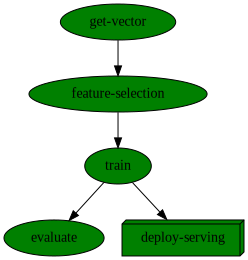

uid,start,state,kind,name,parameters,results
...f8fcc251,Oct 08 13:21:44,completed,run,evaluate,label_columns=labelmodel=store://artifacts/fraud-demo-felipe/transaction_fraud_rf:latest@e27f0d6d-8f14-4642-abee-43b9867631efdrop_columns=label,evaluation_accuracy=0.9905evaluation_f1_score=0.17391304347826086evaluation_precision_score=0.4evaluation_recall_score=0.1111111111111111
...674058e1,Oct 08 13:21:10,completed,run,train,sample=-1label_column=labeltest_size=0.1,best_iteration=1accuracy=0.9905f1_score=0.17391304347826086precision_score=0.4recall_score=0.1111111111111111
...af1f9176,Oct 08 13:20:42,completed,run,feature-selection,output_vector_name=shortlabel_column=labelk=18min_votes=2ignore_type_errors=True,top_features_vector=store://feature-vectors/fraud-demo-felipe/short
...c1e2831f,Oct 08 13:20:21,completed,run,get-vector,"feature_vector=transactions-fraudfeatures=['events.*', 'transactions.amount_max_2h', 'transactions.amount_sum_2h', 'transactions.amount_count_2h', 'transactions.amount_avg_2h', 'transactions.amount_max_12h', 'transactions.amount_sum_12h', 'transactions.amount_count_12h', 'transactions.amount_avg_12h', 'transactions.amount_max_24h', 'transactions.amount_sum_24h', 'transactions.amount_count_24h', 'transactions.amount_avg_24h', 'transactions.es_transportation_sum_14d', 'transactions.es_health_sum_14d', 'transactions.es_otherservices_sum_14d', 'transactions.es_food_sum_14d', 'transactions.es_hotelservices_sum_14d', 'transactions.es_barsandrestaurants_sum_14d', 'transactions.es_tech_sum_14d', 'transactions.es_sportsandtoys_sum_14d', 'transactions.es_wellnessandbeauty_sum_14d', 'transactions.es_hyper_sum_14d', 'transactions.es_fashion_sum_14d', 'transactions.es_home_sum_14d', 'transactions.es_travel_sum_14d', 'transactions.es_leisure_sum_14d', 'transactions.gender_F', 'transactions.gender_M', 'transactions.step', 'transactions.amount', 'transactions.timestamp_hour', 'transactions.timestamp_day_of_week']label_feature=labels.labeltarget={'name': 'parquet', 'kind': 'parquet'}update_stats=True",return=


In [7]:
run_id = project.run(
    'main',
    arguments={'vector_name':"transactions-fraud",
               'features': features,
                'label_column':"labels.label",
              }, 
    dirty=True, watch=True)

## Test del endpoint del modelo


In [ ]:
serving_fn = project.get_function('serving')

sample_id = 'C1000148617'
model_inference_path = '/v2/models/fraud/infer'

serving_fn.invoke(path=model_inference_path,
                  body={'inputs': [[sample_id]]})

> 2024-10-08 13:41:17,914 [info] Invoking function: {"method":"POST","path":"http://nuclio-fraud-demo-felipe-serving.default-tenant.svc.cluster.local:8080/v2/models/fraud/infer"}


{'id': 'c9b5036c-8957-48dc-adba-d7f60ccd7812',
 'model_name': 'fraud',
 'outputs': [0],
 'timestamp': '2024-10-08 13:41:17.934699+00:00',
 'model_version': 'latest'}